In [1]:
# Data Manipulation libraries
import pandas as pd
from pandas.plotting import lag_plot
from datetime import datetime
print(f'pandas: {pd.__version__}')
import numpy as np
print(f'numpy: {np.__version__}')

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# Statistical tools
import sklearn
print(f'sklearn: {sklearn.__version__}')

# Visualization
import plotly
import plotly.express as px
import plotly.graph_objects as go
print(f'plotly: {plotly.__version__}')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (35,20)
print(plt.rcParams['figure.figsize'])

# Other tools
import pickle
import sys 
import os

main_dir=os.path.dirname(sys.path[0])
print(f'Working right now in {main_dir}')
%autosave 120


pandas: 1.4.3
numpy: 1.23.1
sklearn: 1.1.1
plotly: 5.9.0
[35.0, 20.0]
Working right now in D:\Coding\Machine learning\Projects


Autosaving every 120 seconds


In [2]:
df = pd.read_csv("data/tata_stock_data.csv")
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1239 non-null   object 
 1   Open        1239 non-null   float64
 2   High        1239 non-null   float64
 3   Low         1239 non-null   float64
 4   Close       1239 non-null   float64
 5   Volume      1239 non-null   int64  
 6   High-low    1239 non-null   float64
 7   Open-close  1239 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.6+ KB


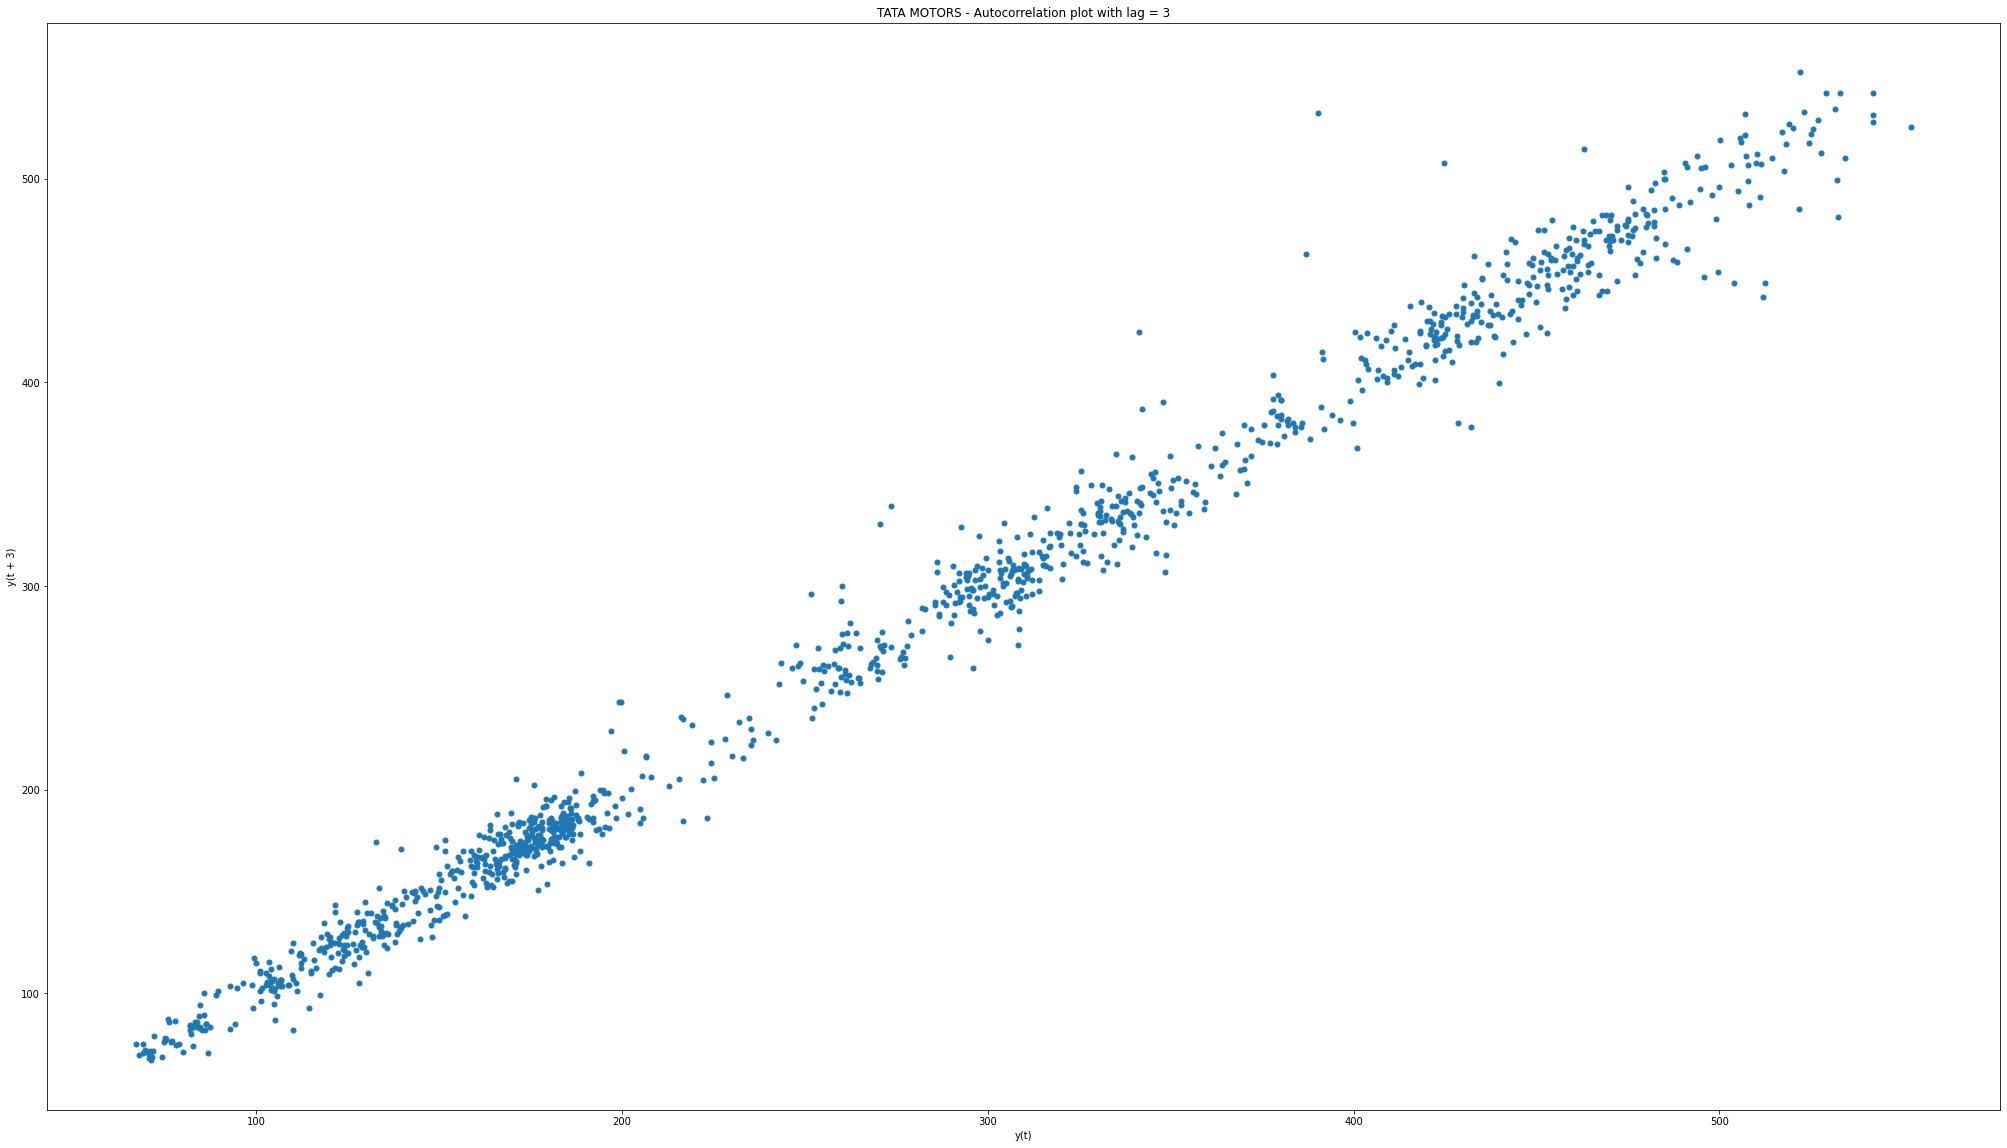

In [15]:
plt.figure()
lag_plot(df['Open'], lag=3, s=25)
plt.title('TATA MOTORS - Autocorrelation plot with lag = 3')
plt.show()

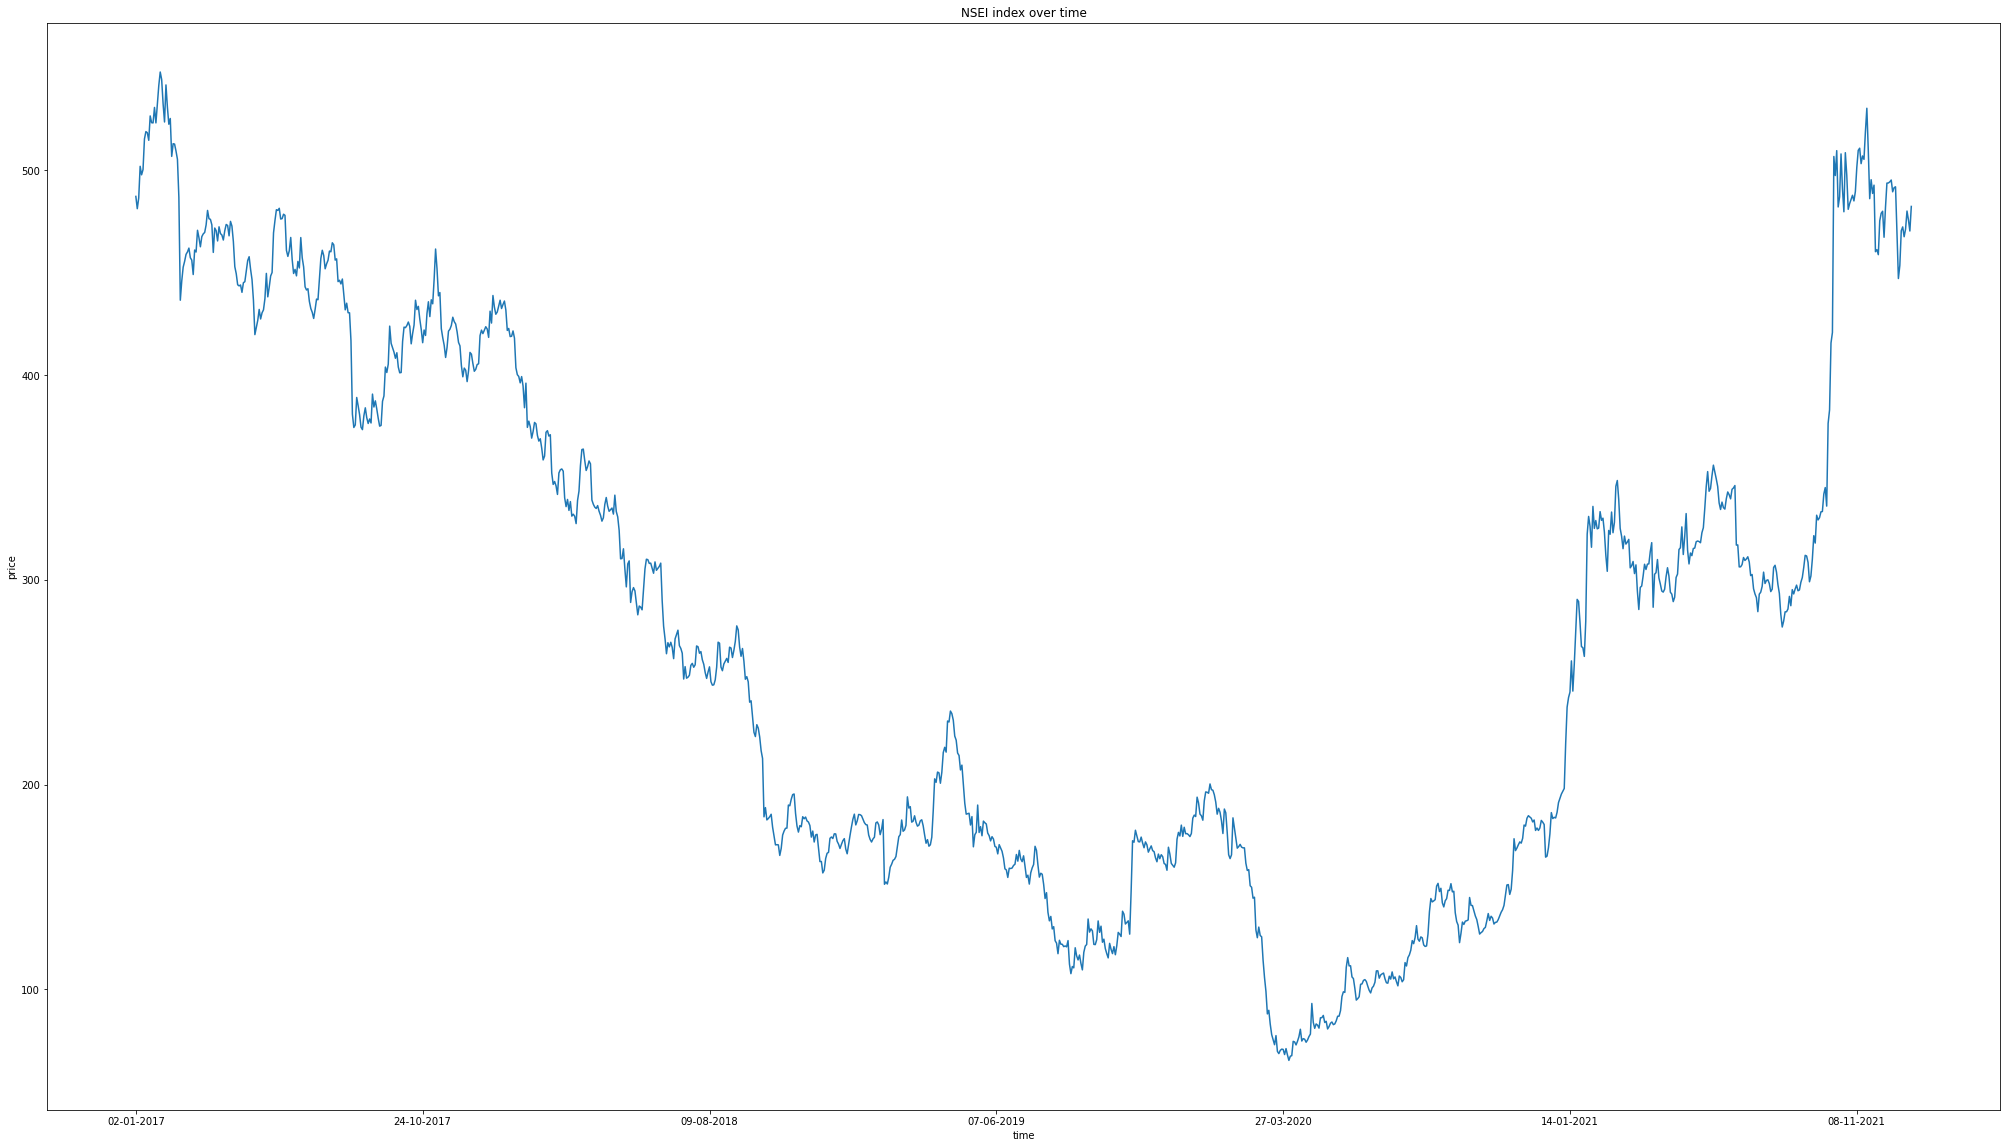

In [4]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,len(df)+1,200), df['Date'][0:len(df)+1:200])
plt.title("NSEI index over time")
plt.xlabel("time")
plt.ylabel("price")
# plt.figure(figsize=(20,35))
plt.rcParams["figure.figsize"] = (35,20)


plt.show()

In [5]:
train_data, test_data  = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 93.60820864499401


In [19]:
# Plot stock prices (actual and predicted) for test (out of time) data
test_set_range = df[int(len(df)*0.7):].Date
fig = go.Figure()

# Trace for actual stock prices
fig.add_trace(go.Scatter(x=test_set_range,
                         y=test_data,
                         mode='lines',
                         name='Actual Prices (Test)',
                         opacity=0.8,
                         line=dict(color='black', width=1)
                        ))

# Trace for predicted stock prices
fig.add_trace(go.Scatter(x=test_set_range,
                         y=model_predictions,
#                          y=scaler.inverse_transform(pred_test.reshape(-1,1)).flatten(),
                         mode='markers',
                         name='Predicted Prices (Test)',
                         opacity=0.8,
                         line=dict(color='red', width=1)
                        ))

# Change chart background color
# fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Date'
                )

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title='Prices (in INR)'
                )

# Set figure title
fig.update_layout(title=dict(text="TATA MOTORS Stock Prices", font=dict(color='black')),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                 )
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))

fig.show()

In [7]:
print(training_data)
print(test_data)


[487.25 481.25 486.5  501.95 497.8  500.35 515.3  518.9  518.35 514.65
 526.55 523.25 523.15 530.7  523.15 532.15 541.4  548.   544.35 532.5
 523.6  541.7  530.85 522.5  525.3  506.8  513.   512.8  509.4  505.4
 486.8  436.55 445.9  452.7  455.5  458.95 460.15 462.   457.3  456.15
 449.1  461.05 460.1  470.7  467.1  462.65 467.6  468.95 469.65 473.35
 480.4  476.35 476.05 473.35 459.9  471.8  470.5  465.5  472.4  469.1
 468.4  465.95 470.45 473.55 473.05 468.   475.05 472.75 465.2  452.95
 449.5  444.1  443.55 444.   440.4  445.1  445.6  450.8  455.95 457.8
 451.65 446.65 436.5  419.75 423.25 426.7  432.05 427.4  430.4  431.85
 437.3  449.65 438.2  442.95 448.4  450.1  469.45 475.45 480.75 480.4
 481.45 476.2  476.4  478.55 478.   460.9  457.95 460.75 467.2  456.5
 449.6  451.6  448.45 455.5  452.3  467.15 457.3  452.8  443.1  441.55
 442.15 435.95 432.5  430.65 427.65 432.05 437.1  436.8  446.75 456.95
 460.95 458.4  451.9  454.3  456.05 460.55 460.2  464.6  463.6  456.15
 456.75 445.

In [8]:
# test_set_range = df[int(len(df)*0.7):].index
# # test_set_range = [i for i in range(0,100)]
# plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
# plt.plot(test_set_range, test_data, color='red', label='Actual Price')
# plt.title('TESLA Prices Prediction')
# plt.xlabel('Date')
# plt.ylabel('Prices')
# plt.xticks(np.arange(int(len(df)*0.7)+1,int(len(df))+1,50), df.Date[int(len(df)*0.7)+1:int(len(df))+1:50])
# plt.legend()
# plt.show()

In [9]:
# https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.fit.html
# https://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.arima_model.ARIMA.fit.html
# https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70
# https://stackoverflow.com/questions/67601211/futurewarning-statsmodels-tsa-arima-model-arma-and-statsmodels-tsa-arima-model
# https://www.statisticshowto.com/lag-plot/#:~:text=A%20lag%20plot%20is%20a,time%20points%20before%20time%20i.


In [10]:
# df = pd.read_csv("BTC-USD.csv")
# df.head(5)
# df.info()

In [11]:
# plt.figure()
# lag_plot(df['Open'], lag=3, s=25)
# plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
# plt.show()

In [12]:
# train_data, test_data  = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
# training_data = train_data['Close'].values
# test_data = test_data['Close'].values
# history = [x for x in training_data]
# model_predictions = []
# N_test_observations = len(test_data)
# for time_point in range(N_test_observations):
#     model = ARIMA(history, order=(4,1,0))
# #     model_fit = model.fit(disp=0)
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     model_predictions.append(yhat)
#     true_test_value = test_data[time_point]
#     history.append(true_test_value)
# MSE_error = mean_squared_error(test_data, model_predictions)
# print('Testing Mean Squared Error is {}'.format(MSE_error))

In [13]:
# split = int(len(df)*0.7)+200

# train_data, test_data  = df[0:split], df[split:]
# date=test_data['Date'].values[0]
# training_data = train_data['Close'].values
# test_data = test_data['Close'].values
# history = [x for x in training_data]
# model_predictions = []
# N_test_observations = len(test_data)
# for time_point in range(10):
#     model = ARIMA(history, order=(4,1,0))
# #     model_fit = model.fit(disp=0)
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     model_predictions.append(yhat)
# #     true_test_value = test_data[time_point]
#     history.append(yhat)
# print(date)
# # MSE_error = mean_squared_error(test_data, model_predictions)
# # print('Testing Mean Squared Error is {}'.format(MSE_error))

In [14]:
# test_set_range = df[int(len(df)*0.7):].index
# # test_set_range = [i for i in range(0,100)]
# plt.plot(np.arange(10), model_predictions, color='blue', marker='', linestyle='dashed',label='Predicted Price')
# plt.plot(np.arange(10), test_data[0:10], color='red', label='Actual Price')
# plt.title('BTC Prices Prediction')
# plt.xlabel('Date')
# plt.ylabel('Prices')
# # plt.xticks(np.arange(9), df.Date[split:split+10:10])

# plt.legend()
# plt.show()
# print(date)